#### This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [257]:
# load csv file first
df=pd.read_csv("E:\\Data Science\\Data science Practise project\\mushrooms.csv")  # here we give path of csv file
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


#### Here dataframe df contains all text categorical data, we need encoding for this

In [3]:
# in above data set column "class" is lable and reamianing all column is features 

In [4]:
df.shape # here we 8124 rows and 23 columns

(8124, 23)

In [5]:
df.describe()  # this method is used to find stattistical data such as mean,min and max, but here our data is text, so we get only frequency and total counts

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


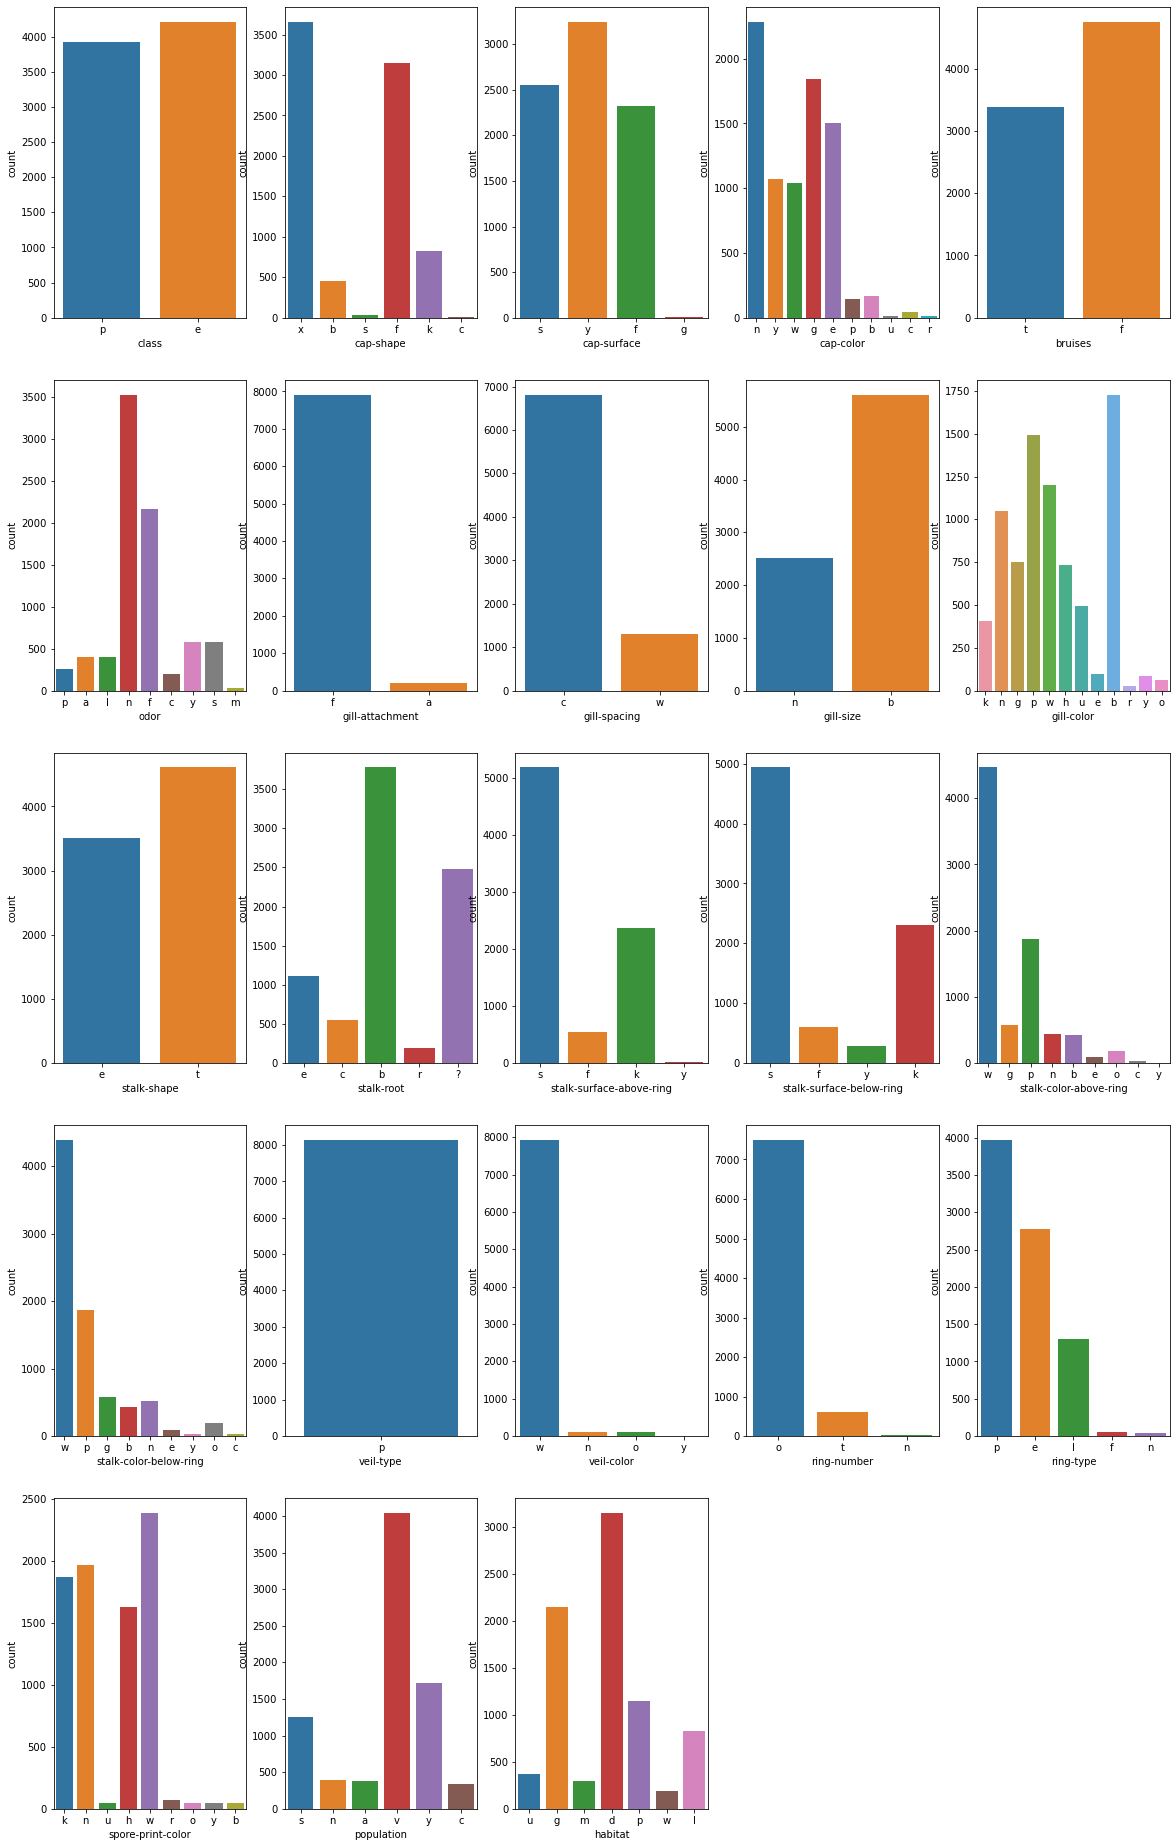

In [258]:
plt.figure(figsize=(20,40))  # here 20 represent the  row size and 40 repesent the column size
plotnumber=1 # initially plotnumber is set to 1
for column in df:  # we pass every column of df into for loop
    if plotnumber<=30: # we set maximum plotnumber to less than or equal to 30
        plt.subplot(6,5,plotnumber) # subplot used to plot in 6 rows and 5 columns
        ax=sns.countplot(x=df[column],data=df) #  countplot give the frequency of each class in a column
        plt.xlabel(column) # assign feature name to x axis
    plotnumber+=1  # increment plotnumber after every iteration
plt.show() # diplay the plot

### here we observed countplot for each and every categorical feature and label in dataframe, each plot shows total class in every feature and its frequency also 

In [7]:
# descibe method give the details about how much class is used for every column
# for example for column 'CapShape' total six classes are defined,

In [8]:
# lets check any Na value is there or not
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### No Nan value is there ,so next we apply encoding to covert the text data into numerical, as data label has class ,so it is classification problem

In [9]:
df.loc[df["class"]== " "]  # here we check any for empty space, but no empty space all features and labels ,its good 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


#### we check above command for every feature also

In [10]:
x=df.drop(columns=['class'],axis=1)  # here we separated our input fetures from label
y=df['class'] # y contains only label

In [207]:
# lets apply binary encoding on above data
from category_encoders import BinaryEncoder  # Binary encoder convert text data into binary form
bi_enc=BinaryEncoder()
df_bi=bi_enc.fit_transform(x) # apply feature to binary encoder
df_bi

,cap-shape_0,cap-shape_1,cap-shape_2,cap-shape_3,cap-surface_0,cap-surface_1,cap-surface_2,cap-color_0,cap-color_1,cap-color_2,...,spore-print-color_3,spore-print-color_4,population_0,population_1,population_2,population_3,habitat_0,habitat_1,habitat_2,habitat_3
0,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,1
3,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,1,0,0,1,...,1,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,1,0,1,0,0,1,0,0,0,...,0,1,0,1,1,0,0,1,1,1
8120,0,0,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,1,1
8121,0,1,0,0,0,0,1,0,0,0,...,0,1,0,1,1,0,0,1,1,1
8122,0,1,0,1,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,1,1


#### Due to binary encoding each column content get transformed to binary values, for example feature "cap-shape" has 6 class ,in binary encoding it has value from 0000 to 0101 ,it convert 4 columns, so due to binary encoding 23 columns get converted to 76 columns

In [208]:
# now apply encoding for class label

In [209]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()  # here  class has 2 class p & e,label encoder output gives 1 & 0 for two class
y_enc=lab_enc.fit_transform(y) # apply & transfrom data from text to number
y_enc

array([1, 0, 0, ..., 0, 1, 0])

In [210]:
y_final=pd.Series(y_enc)  # here we convert array into Series
y_final

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Length: 8124, dtype: int32

#### here class p assigned to 1 and class e is assigned to 0

In [199]:
y_final.shape # here it consist of only one column and 8124 rows

(8124,)

### now check whether our label is balanced or imbalanced

0    4208
1    3916
dtype: int64

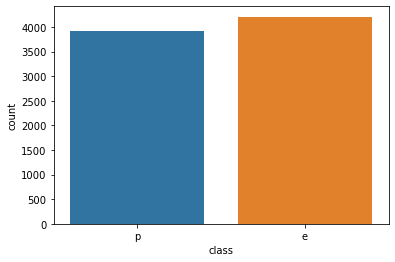

In [211]:
ax=sns.countplot(x='class',data=df)
y_final.value_counts() # first we count the class count, to decide data is balanced or not

#### here we have seen not so much difference between o count and 1 count,it means data is balanced
#3916/4208=0.9306  only 9% diffrence in data

In [212]:
# all column in our dataset is in binary form, so no need of  standard scaler,
# we can directly use train test split

In [237]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_bi,y_final,test_size=0.30,random_state=10) 
# we give 30% data to testing and 70% to training

In [238]:
# due to binary classification we use logistic regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [239]:
y_pred=log_reg.predict(x_test) # here we get predicted output by using x_test
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [240]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [241]:
accuracy0=log_reg.score(x_test,y_test)  # it is ratio of correct prediction/total data points
accuracy0*100

99.4667760459393

#### here we get 99.79 % accuracy,now we will find confusion matrix

In [242]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[1267,    9],
       [   4, 1158]], dtype=int64)

#### confusion matrix gives us correct prediction=(1235+1198)=2431 and incorrect prediction=4+1=5 so accuracy is ratio of 2431/2438,which is 99.79

In [243]:
# now we will calculate auc score
auc=roc_auc_score(y_test,y_pred)  # auc is area under roc curve and measure across all posible threshold
auc

0.9947521838361058

In [244]:
# now we will build other models 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [245]:
DTC=DecisionTreeClassifier()  # first we use decision tree
DTC.fit(x_train,y_train)  # fit training data to classifier
pred=DTC.predict(x_test) # predict output according test data
acc=classification_report(y_test,pred)  # here we compared y_test with predicted output,if both are same then 100% accuracy
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1276
           1       1.00      1.00      1.00      1162

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



#### here we get 100% accuracy for Decision Tree

In [246]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)# fit training data to classifier
pred1=RFC.predict(x_test)# predict output according test data
acc1=classification_report(y_test,pred1) # here we compared y_test with predicted output,if both are same then 100% accuracy
print(acc1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1276
           1       1.00      1.00      1.00      1162

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



#### we get 100 % accuracy for Random Forest classifier

In [247]:
svc=SVC()
svc.fit(x_train,y_train)# fit training data to classifier
pred2=svc.predict(x_test)# predict output according test data
acc2=classification_report(y_test,pred2)# here we compared y_test with predicted output,if both are same then 100% accuracy
print(acc2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1276
           1       1.00      1.00      1.00      1162

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



#### here we get 100% accuracy for support vector classifier

### In above all model ,we get almost 99 and 100 % accuracy,but there is chance of overfitting model.it means data in training and testing might be repeated,so to avoid this we use cross validation

In [248]:
# now we will do calculation of cross validation score
from sklearn.model_selection import cross_val_score

In [249]:
a=cross_val_score(log_reg,df_bi,y_final,cv=5).mean() #we calculate CV score for logistic Regression,cv=5 means it produces 5 different score,we take mean of it
print(a*100)

87.7243956043956


In [250]:
b=cross_val_score(DTC,df_bi,y_final,cv=5).mean() #we calculate CV score for Decision Tree Classifier
b*100

90.54381205001896

In [251]:
c=cross_val_score(RFC,df_bi,y_final,cv=5).mean()
c*100 #we calculate CV score for Random Forest Classifier

90.44528988253127

In [252]:
d=cross_val_score(svc,df_bi,y_final,cv=5).mean()  # we calculate CV score for Support Vector Classifier
d*100

88.93054945054945

In [253]:
diff_log_reg=accuracy0*100-a*100  # difference between accuracy and r2 score of logistic regression
diff_log_reg

11.742380441543702

In [254]:
diff_DTC=100-b*100 #difference between accuracy and r2 score of Decision Tree classifier
diff_DTC

9.456187949981043

In [255]:
diff_RFC=100-c*100 #difference between accuracy and r2 score of Random Forest classifier
diff_RFC

9.55471011746873

In [256]:
diff_SVC=100-d*100 #difference between accuracy and r2 score of support vector classifier
diff_SVC

11.06945054945055

#### here difference for  Decision Tree and its CV score is less ,so Decision Tree is best model, lets do hyperparameter tuning for Decision Tree

In [185]:
from sklearn.model_selection import GridSearchCV
grid_param=[{'criterion':['gini','entropy'],
           'max_depth':range(2,12,1),# range from 2 to 11 with step size is 1
           'min_samples_leaf':range(3,10,2),# range from 3 to 9 with step size is 1 
           'min_samples_split':range(4,10,2)}] # range from 4 to 9 with stepsize is 1

#### if there are more feature & we can't decide which feature is the best feature which can be taken as root node,for that "gini" & "entropy is used".Max depth is how our tree goes deep.more deep results more spliting.min sample split denotes minimum sample required to split internal node.min sample leaf is minimum sample  required at leaf node 


In [186]:
gridsearch=GridSearchCV(estimator=DTC,param_grid=grid_param,cv=5,n_jobs=-1)

In [187]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 12),
                          'min_samples_leaf': range(3, 10, 2),
                          'min_samples_split': range(4, 10, 2)}])

In [188]:
best_parameter=gridsearch.best_params_

In [189]:
print(best_parameter)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 4}


In [190]:
# pass this parameter to decision tree classifier
DTC=DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_leaf=3,min_samples_split=4) # gini is used for selecting root node,
# max_depth is 7 means tree goes down upto 7 depth, 3 is minimum sample at leaf node,4 is minimum samplerequired to split internal node

In [191]:
DTC.fit(x_train,y_train) # fit traing feature and training label to model 
DTC.score(x_test,y_test) # we get score of test feature and test label

1.0

In [192]:
# we get 100% score
y_pred=DTC.predict(x_test)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [194]:
accuracy_score(y_test,y_pred)  # accuracy score of both testing label and predicted label is 100

1.0

In [195]:
# lets calculate ROC_AUC score for decision tree classifier
roc_auc_score(y_test,DTC.predict(x_test))

1.0

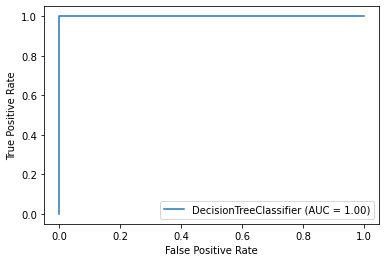

In [196]:
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(DTC,x_test,y_test)

#### This curve helps us to choose the best model amongst the models for which we have plotted ROC curve.The best model is one which cover the maximum area under it.our Decision tree ROC curve cover 100% area under it.

In [49]:
# lets save our model
import joblib # it provides utilities for saving and loading python project
joblib.dump(DTC,"DTC.pkl")

['DTC.pkl']

### here we saved our best model successfully